In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/MyDrive/Satria Data pt 2/Semifinal/'

Mounted at /content/drive


### Preprocess Data

In [2]:
df = pd.read_csv(folder_path + 'Dataset/encrypted_merge.csv')

In [4]:
nama_re = []
for ind, row in df.iterrows():
  if row['tcode'] == 'rt':
    tweet_rt = row['content'].strip()
    temp = tweet_rt.split('[RE ')[-1]
    temp = temp[:-1]
    nama_re.append(temp)
  else:
    nama_re.append('-')

df['nama_re'] = nama_re
df

,created_at,username,tcode,num_retweets,type,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,content,lang,nama_re
0,2024-01-04T09:57:09Z,@QOS7XYPBfXZWFeLSmdLEt8njUMwwr2Fpel3Cqvh2gW4=,rt,1248,twit,266.0,107.0,9687.0,NaN,0.0,RT K-Popers Berencana Kirim Food Truck untuk A...,id,tempodotco
1,2024-01-04T09:57:09Z,@lSDenDKpcZVnv9txjBcg5qaqxYgVAq/3gTvA8yxPuL4=,rt,195,twit,564.0,303.0,12461.0,indonesia kaya,2.0,RT Bapak Pendeta Yusak ini Dari Magetan ke Pon...,id,Yurissa_Samosir
2,2024-01-04T09:57:10Z,@Ykjdr3xs5+WfH9zBQMoAx5fdTeAwmRRm28PFVw5JeJE=,rt,116,twit,376.0,156.0,7488.0,Indonesia,1.0,"RT Viral , Gimana Mak Mak di jakarta tidak ter...",id,STresnowati1
3,2024-01-04T09:57:10Z,@KQ/OmqgBG/U/OVkvpqAQYYiAThFGxQBtg3J5Vjp4Glk=,rt,2264,twit,163.0,203.0,2065.0,NaN,0.0,"RT Mendengar Pak Anies disini, rasanya saya su...",id,tomlembong
4,2024-01-04T09:57:11Z,@yqECLRUCZgqx8VzEUl430Wj6mfh2SgDYzKwala0bT5o=,rt,1157,twit,1.0,1.0,798.0,NaN,0.0,RT Media Asing Soroti Cara Anies Gaet Pemilih ...,id,CNNIndonesia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817350,2024-01-06T11:18:04Z,@TwCvtXMk0shToRwnuGzJqqc7CnNfKu5Sy2KGxobvrzE=,rt,1496,twit,139.0,30.0,1308.0,NaN,0.0,RT di Cegat Oleh Anak -Anak Milenial dan Anak-...,id,Yurissa_Samosir
9817351,2024-01-06T11:18:04Z,@pEX2KVZs+Vknz0IAD1nLk9XL7f+4tUbLI7k5MkUvZz8=,rt,4,twit,473.0,237.0,21617.0,NaN,0.0,"RT APK dari Pusat Tiba, ANIes Kota Solo Berger...",id,kba_news
9817352,2024-01-06T11:18:05Z,@KhXOHuWg3rF+tH/IvnVdIKE6gkQoU5+CqePqmIFFrQg=,rt,151,twit,143.0,56.0,2932.0,NaN,0.0,RT Tetap semangat pak @kYo4g8BWrOVt8nzENmM18Ff...,id,TheLadyJoker
9817353,2024-01-06T11:18:06Z,@aAJ+fus0G60OSVYs5r2RVSwp90Lb7qwwNnUQmiE0cIY=,rt,996,twit,337.0,208.0,26490.0,NaN,0.0,RT Saya mau cari hadiah untuk mas Anies topi s...,id,cakimiNOW


In [5]:
import re
from bs4 import BeautifulSoup


# handle casefold, mentions, links, and whitespaces
def preprocess_tweet(tweet):
    tweet = tweet.casefold()

    tweet = re.sub(r'@\S+', ' ', tweet)

    tweet = re.sub(r'http\S+|https\S+|www\S+', ' ', tweet)

    soup = BeautifulSoup(tweet, 'html.parser')
    tweet = soup.get_text()

    # Remove extra spaces
    tweet = re.sub(r'\s+', ' ', tweet).strip()

    return tweet

In [6]:
print('@TaMJoOLodMKkoLGb6D7kQt0Xu9UOcQLMRZLaYsmTms8= Ga capek urus Prabowo? &amp; Mending urus Ganjar noh'.casefold())
print(preprocess_tweet('@TaMJoOLodMKkoLGb6D7kQt0Xu9UOcQLMRZLaYsmTms8= Ga capek urus Prabowo? &amp; Mending urus Ganjar noh'))

@tamjoolodmkkolgb6d7kqt0xu9uocqlmrzlaysmtms8= ga capek urus prabowo? &amp; mending urus ganjar noh
ga capek urus prabowo? & mending urus ganjar noh


In [7]:
df['real_content'] = df['content']
df['content'] = df['content'].apply(preprocess_tweet)
df['created_at'] = pd.to_datetime(df['created_at'])
df

<ipython-input-5-e95f351eed95>:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(tweet, 'html.parser')


,created_at,username,tcode,num_retweets,type,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,content,lang,nama_re,real_content
0,2024-01-04 09:57:09+00:00,@QOS7XYPBfXZWFeLSmdLEt8njUMwwr2Fpel3Cqvh2gW4=,rt,1248,twit,266.0,107.0,9687.0,NaN,0.0,rt k-popers berencana kirim food truck untuk a...,id,tempodotco,RT K-Popers Berencana Kirim Food Truck untuk A...
1,2024-01-04 09:57:09+00:00,@lSDenDKpcZVnv9txjBcg5qaqxYgVAq/3gTvA8yxPuL4=,rt,195,twit,564.0,303.0,12461.0,indonesia kaya,2.0,rt bapak pendeta yusak ini dari magetan ke pon...,id,Yurissa_Samosir,RT Bapak Pendeta Yusak ini Dari Magetan ke Pon...
2,2024-01-04 09:57:10+00:00,@Ykjdr3xs5+WfH9zBQMoAx5fdTeAwmRRm28PFVw5JeJE=,rt,116,twit,376.0,156.0,7488.0,Indonesia,1.0,"rt viral , gimana mak mak di jakarta tidak ter...",id,STresnowati1,"RT Viral , Gimana Mak Mak di jakarta tidak ter..."
3,2024-01-04 09:57:10+00:00,@KQ/OmqgBG/U/OVkvpqAQYYiAThFGxQBtg3J5Vjp4Glk=,rt,2264,twit,163.0,203.0,2065.0,NaN,0.0,"rt mendengar pak anies disini, rasanya saya su...",id,tomlembong,"RT Mendengar Pak Anies disini, rasanya saya su..."
4,2024-01-04 09:57:11+00:00,@yqECLRUCZgqx8VzEUl430Wj6mfh2SgDYzKwala0bT5o=,rt,1157,twit,1.0,1.0,798.0,NaN,0.0,rt media asing soroti cara anies gaet pemilih ...,id,CNNIndonesia,RT Media Asing Soroti Cara Anies Gaet Pemilih ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817350,2024-01-06 11:18:04+00:00,@TwCvtXMk0shToRwnuGzJqqc7CnNfKu5Sy2KGxobvrzE=,rt,1496,twit,139.0,30.0,1308.0,NaN,0.0,rt di cegat oleh anak -anak milenial dan anak-...,id,Yurissa_Samosir,RT di Cegat Oleh Anak -Anak Milenial dan Anak-...
9817351,2024-01-06 11:18:04+00:00,@pEX2KVZs+Vknz0IAD1nLk9XL7f+4tUbLI7k5MkUvZz8=,rt,4,twit,473.0,237.0,21617.0,NaN,0.0,"rt apk dari pusat tiba, anies kota solo berger...",id,kba_news,"RT APK dari Pusat Tiba, ANIes Kota Solo Berger..."
9817352,2024-01-06 11:18:05+00:00,@KhXOHuWg3rF+tH/IvnVdIKE6gkQoU5+CqePqmIFFrQg=,rt,151,twit,143.0,56.0,2932.0,NaN,0.0,rt tetap semangat pak tetap semangat pak tetap...,id,TheLadyJoker,RT Tetap semangat pak @kYo4g8BWrOVt8nzENmM18Ff...
9817353,2024-01-06 11:18:06+00:00,@aAJ+fus0G60OSVYs5r2RVSwp90Lb7qwwNnUQmiE0cIY=,rt,996,twit,337.0,208.0,26490.0,NaN,0.0,rt saya mau cari hadiah untuk mas anies topi s...,id,cakimiNOW,RT Saya mau cari hadiah untuk mas Anies topi s...


In [8]:
columns_to_fill_numerical = ['num_retweets', 'frn_cnt', 'flw_cnt', 'sts_cnt', 'lst_cnt']
df[columns_to_fill_numerical] = df[columns_to_fill_numerical].fillna(0)  # Use 'ffill' or other methods as needed

columns_to_fill_string = ['username', 'type', 'loc', 'lang']
df[columns_to_fill_string] = df[columns_to_fill_string].fillna('-')  # Use 'ffill' or other methods as needed

In [9]:
# import pickle

# df.to_pickle('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/df_clean_base.pkl')

In [11]:
import pandas as pd

def get_mode(series):
    return series.mode()[0]

# Group by 'content' and aggregate
result_df = df.groupby('content').agg(
    real_content=('real_content', 'first'),
    created_at=('created_at', 'max'),
    username=('username', 'first'),
    tcode=('tcode', 'first'),
    num_retweets=('num_retweets', 'max'),
    frn_cnt=('frn_cnt', 'mean'),
    flw_cnt=('flw_cnt', 'mean'),
    sts_cnt=('sts_cnt', 'mean'),
    loc=('loc', get_mode),
    lst_cnt=('lst_cnt', 'mean'),
    lang=('lang', get_mode),
    appearance_count=('content', 'size'),
    nama_re=('nama_re', 'first')
).reset_index()

result_df

,content,real_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re
0,,@X3PdsT0s+nosDiSVDq3nQPNxLKQV1ZMBl5NDSXLLnOs= ...,2024-01-31 17:26:28+00:00,@be9+Qm5EsBY7VLxMEGgBlOYaT0KrMsiQQLzN5iG2hOY=,reply,36,696.150781,1543.289555,14114.732016,-,1.757412,id,9411,-
1,!,@9ZwcLHT18/fgudsdN9vmg9J97LmX6RgmUQ41zZwq484= ...,2024-01-29 16:57:00+00:00,@JVWxyA2fM/S2B0bN/n/buYbHxNqUC91UUX6ShBzub+I=,reply,0,327.000000,208.666667,11230.333333,-,0.000000,id,3,-
2,! deretan pesohor dan selebriti yang dukung ga...,! Deretan Pesohor dan Selebriti yang Dukung Ga...,2024-01-30 02:03:42+00:00,@7jB3OiFFcymo1DxD4GO8wR2tuWnQLk+nRHfZmLs1iHo=,mention,0,28.000000,2.000000,75.000000,Indonesia,0.000000,id,1,-
3,!! iya pakk salah strategii next nya di perbai...,@04DvPx8s7LBc4cxDKmtXMRGxzcWjux55XJYA4DJpUOQ= ...,2024-01-07 15:57:19+00:00,@CDJsmOeil3IHVzBWFKLBs21n0Q2nBvRird0Wb9yxync=,reply,0,2.000000,2.000000,234.000000,-,0.000000,id,1,-
4,!! katanya sudah dikembalikan oleh !!,@YKXM72NPxrEQof3YA3UvtB1N7433ER/5HCHcbEdjJi8= ...,2024-01-19 04:19:17+00:00,@X4DJ8WnurWZZIm9IizCEzcdSPvFwGF1pnHnLk1YMgWk=,reply,0,1347.000000,1390.000000,60962.000000,-,0.000000,id,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161194,ùùù ùúªùø±ùùùø§ ùùù ùúªùø±ù ø§ùù...,ÙÙÙ ÙÚªÙØ±ÙÙÙØ§ ÙÙÙ ÙÚªÙØ±Ù Ø§ÙÙ...,2024-01-23 19:33:56+00:00,@YlUZ3ZhBsq0qbJW78fvg+NQa9XAwlZc4Td3UlJnX9VM=,reply,0,817.000000,214.000000,804.000000,Semarang Jawa Tengah,0.000000,id,1,-
2161195,ùø§ ø§ùùù ùø§ ø±ø¨ lihatlah pak anies ..p...,@4uY/ZdECIddb7Nic17AVwJvAOMYdB6FA2V9bUbDB4LE= ...,2024-01-05 08:07:21+00:00,@L6SfnSmUwh00lMBvj0JM+1MAFGNyHoDgNsZFTsGSPrg=,reply,0,755.000000,376.000000,6844.000000,-,0.000000,id,1,-
2161196,ùø§ù ùùùùùùø·ùùù ùø§ù ùùùùùù...,ÙØ§Ù ÙÙÙÙÙÙØ·ÙÙÙ ÙØ§Ù ÙÙÙÙÙÙ...,2024-01-28 23:46:18+00:00,@2kSMZAr8Of/TLnCFHP74tuRyrjGH5zTSj8Cg8xVSPd4=,mention,0,21.000000,54.000000,1279.000000,"Riau, Indonesia",0.000000,id,1,-
2161197,ùø±ùø¯ù ø§ùùù øªø¨ø§ø±ù ùøªø¹ø§ùù ù...,@GZMEjTAgvDMOgE/eyq6dkYIbNfMI2fVEyWe3APOdUDU= ...,2024-01-21 23:32:46+00:00,@39Pxegm8y2KaJWoGqZHOF05wmueMui4u2yP8EaaK2YM=,reply,0,120.000000,73.000000,791.000000,"Sukasari, Indonesia",0.000000,id,1,-


In [12]:
# result_df.to_pickle('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/result_df_clean.pkl')

In [13]:
df['tcode'].value_counts()

tcode
rt         6497711
mention    2121754
reply      1197890
Name: count, dtype: int64

In [14]:
result_df['tcode'].value_counts()

tcode
mention    1002090
reply       957233
rt          201876
Name: count, dtype: int64

### Create Data Label Manual

In [ ]:
result_df = pd.read_pickle('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset_Part2/surya_prep_step1_dropped.pkl')
result_df

,clean_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re
0,,2024-01-31 17:56:21+00:00,@/YVOFjESEAVlZxJ6wM0f8jdsaQON7seAYx35rKatQII=,rt,89,1191.691298,2665.492256,22284.476084,-,2.099210,id,16077,RaviAbi51236
1,!,2024-01-29 16:57:00+00:00,@CrGiujGfoU0FSz2fzfvDU6Eog0QiZYSw4iSC+hwGRmQ=,reply,0,429.250000,315.250000,16510.000000,-,0.250000,id,4,-
2,! ! ANIES ROCKS DEBAT CAPRES #Anies2ndStage #H...,2024-01-07 12:24:31+00:00,@yMJ3CsRc91f+At1ynQ8yaxhAJfTmM+ZEZrLFvaUIyeE=,mention,0,77.000000,51.000000,4972.000000,nowhere,0.000000,id,1,-
3,"! ., ( 19-1-2024) Prabowo Ungkap Rasio Utang B...",2024-01-19 07:39:21+00:00,@BPfs4ab7X7evTJWjphZtcq+ajnefXVyTFfREbtJZiu0=,mention,0,3457.000000,2042.000000,36864.000000,Jakarta Pusat,1.000000,id,1,-
4,! ANIES ROCKS DEBAT CAPRES #Anies2ndStage #Hwa...,2024-01-07 13:13:15+00:00,@IdZ4MZc55eEC7Vz4XD2I01IqpxjK38IXkF8kXs8ORhk=,rt,3,835.200000,281.100000,13609.200000,-,2.300000,id,10,iamrocket96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827978,"~terharu~ ~semoga pak Anies semakin kuat, dan ...",2024-01-18 11:25:17+00:00,@RLx9MQkPOUtJExiYhq22qzGX5UTPFTCUtusVdzVjhrE=,reply,0,4001.000000,4054.000000,3907.000000,Indonesia,1.000000,id,1,-
1827979,~yg mana itu bisa menjadi blunder buat pak ani...,2024-01-10 02:50:15+00:00,@5dYr5xgQ3z8UoRGu4XVPbyz5mEZTL2pvUkglHBnHB14=,reply,0,114.000000,45.000000,1079.000000,-,0.000000,id,1,-
1827980,~~~ !! ANIES ROCKS DEBAT CAPRES #Anies2ndStage...,2024-01-07 11:51:15+00:00,@Dyj3VS+tKBN99xSAwhGI1y6csRjb0a4KXlillEZP7R0=,reply,0,627.000000,534.000000,25003.000000,-,1.000000,id,1,-
1827981,~~~ GANJAR SOSOK PEMIMPIN JAMAN NOW ~~~ Pemimp...,2024-01-07 15:57:52+00:00,@VgjlmlhJmOs5VrBDLAHiraEPtNJedAINBLP6H/fZV40=,rt,41,6412.622222,11010.666667,69181.088889,-,2.266667,id,45,denni_sauya


In [ ]:
result_df['tcode'].value_counts()

tcode
reply      924849
mention    785706
rt         117428
Name: count, dtype: int64

##### Buzz

In [ ]:
buzz_df1 = result_df.loc[
    (result_df['nama_re'].str.contains(r'\d{3,}', regex=True)) &
    (result_df['sts_cnt'] > 1000)
].sample(3000, random_state=42)
buzz_df1

,clean_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re
248545,"Calon Presiden nomor urut tiga, Ganjar Pranowo...",2024-01-14 15:08:19+00:00,@IkdJvWFPU9XLlBDpKCm8rtsUPg67DPHYVhSGwVD0HEg=,rt,3,1064.000000,10514.000000,74672.000000,Indonesia,0.000,id,1,125Japstyle
456737,Ganjar Pranowo Mahfud MD pemimpin yang nggak p...,2024-01-22 18:04:59+00:00,@p5WGjZ/npQUyJDplJtpJWhCFHHDRe0wzfZhC9lNPUuE=,rt,8,14.000000,10.250000,4392.250000,-,0.000,id,4,gmonoona143
638676,Ini manusia Bunglon ...bacot taik pantesan di ...,2024-01-21 11:05:14+00:00,@3/gFzMdQpBycR7/JFQ8uj9C5gcBna7ZpSMwyCXwZFew=,rt,1,2381.000000,5613.000000,31489.000000,-,2.500,id,2,Andria75777
234418,Budiman Sudjatmiko you are a traitor to your c...,2024-01-12 05:51:17+00:00,@8g56kLP52zeZgpa2CbKOTRye/fvtmC7uaKPcdMahedE=,rt,6,515.600000,200.000000,47099.200000,-,2.000,id,5,vela2789234892
1213703,Prabowo dengan segala putus asa nya:,2024-01-07 23:23:19+00:00,@kO12hWnI4toRJlGONo7reRhGNJ211qZm6szZYg2xs3M=,rt,6,470.500000,6427.500000,5815.000000,-,3.000,id,2,tomy46774
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29738,"1. Done FOLLOW RT 2. Alasan dukung Ganjar, dar...",2024-01-03 03:11:56+00:00,@MfQINg9YM0itzYpdje3ZMRqYWny3s+5XT+KtG5aZ1VA=,rt,2,3737.333333,6064.666667,38602.666667,-,1.000,id,3,Saodah1234
374553,Dynasti Politic No More !!! INDONESIA FOREVER ...,2024-01-08 05:16:19+00:00,@T9UMCLykN60+GzGmDAy72AOSutNDfw5kW3f2znmv3GI=,rt,14,1665.250000,1232.750000,32164.500000,-,0.375,id,8,Freed0mland5151
1342079,Sebenarnya Pak prabowo punya data tapi memang ...,2024-01-09 09:03:24+00:00,@huhJh4f1G2p4HWB+qGhkD59cfx28/73LW7VzetRDsGA=,rt,2,962.000000,917.000000,6456.500000,-,2.500,id,2,JajovJ24962
377958,"Ekspresi beliau saat membicarakan ""Gubernur An...",2024-01-30 14:58:05+00:00,@JqGknxY0vcmRNg/2I5gEIaEKpDiUGhqantRTG7RwrVE=,rt,3,395.000000,385.000000,35873.000000,-,0.250,id,4,viawan67196


In [ ]:
buzz_df2 = result_df.loc[
    (result_df['nama_re'].str.contains(r'\d{3,}', regex=True)) &
    (result_df['flw_cnt'] < 100)
].sample(3000, random_state=42)
buzz_df2

,clean_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re
453627,"Ganjar Pranowo Mahfud MD #GanjarForPresident, ...",2024-01-20 14:17:27+00:00,@ZQFY1ndOVPDTdssK3G6h/uc9geN5M8X20ySEs4+hrco=,rt,5,6.0,0.000000,107.000000,-,0.0,id,1,dumhmeey7845
267022,Cawapres Mahfud MD ingin hadirkan keajaiban pe...,2024-01-22 13:32:52+00:00,@VREw56n4MgSbOTePmY3pYOAZYQaXkGfs1sSIXA13OJ8=,rt,5,0.0,0.000000,148.000000,-,0.0,id,1,PageJamya4623
237111,"Bukan hanya joget, pemuda saat ini perlu progr...",2024-01-16 13:32:16+00:00,@uG3ETccFExSdhAbs6gntofVhPpmbQ6NwkmYV5xZbW14=,rt,15,0.0,0.000000,868.000000,-,0.0,id,1,agusadrian9445
1312381,Salut untuk pak prabowo dengan kenegarawaannya...,2024-01-08 22:27:31+00:00,@e7AgLk+gQVY+dvA78NV22ngCntLatv1qeppRt2Nvyhk=,rt,1,89.5,44.500000,179.500000,-,0.0,id,2,SugondoYon88806
1365211,Semangat Pagi Salah satu target mas Kaesang ad...,2024-01-04 04:23:34+00:00,@c6t8HVf+XpWmCXYvpCrOPAD1bZyetKspktCygWM4YAc=,rt,1,99.0,38.000000,3308.000000,-,0.0,id,1,Pendekar969
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303118,"Data pertanian, senjata andalan Program Capres...",2024-01-22 22:58:38+00:00,@WLYYi6GWvCjT0LsHAhtVSU/NmJGwNy+IKZzRgEqWpPE=,rt,15,0.0,0.000000,1328.000000,-,0.0,id,15,RisnaVeraw22441
195367,Bersama Capres Cawapres Ganjar Pranowo Mahfud ...,2024-01-21 03:13:54+00:00,@6UZ64eYhweX/1f6LgfJZVzwD2zkNPH6jZeJyHVMKnWE=,rt,2,0.0,0.000000,306.000000,-,0.0,id,1,SladeHart280453
453411,"Ganjar Pranowo Mahfud MD #GanjarForPresident, ...",2024-01-21 09:16:16+00:00,@aLpQornIk30Sy8kHP3OUavvLKS1GkXwAoUTIcGMnn00=,rt,1,14.0,0.000000,125.000000,-,0.0,id,1,jttts84589488
1184700,"Pilihan yang tepat untuk masa depan, #GanjarPi...",2024-01-20 02:23:32+00:00,@nw9Yszcul+VNKlJ3YvvRzD8ZvXfY9wzP4/8r3dCTMJI=,rt,5,19.0,2.666667,3225.666667,-,0.0,id,3,LoganWalke93437


In [ ]:
buzz_df3 = result_df.loc[
    (result_df['sts_cnt'] > 1000) &
    (result_df['flw_cnt'] < 100)
].sample(3000, random_state=42)
buzz_df3

,clean_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re
339950,Diskualifikasi capres dan cawapres Prabowo Gib...,2024-01-17 09:31:53+00:00,@A1viQQnNSIlOt3xRFQ/IGPPpEICg2COh+/P96psBPXE=,reply,0,281.0,80.000000,3822.000000,-,0.0,id,1,-
1245181,"Prabowo, rasa simpatimu kepada korban sungguh ...",2024-01-03 07:58:18+00:00,@WBQKpXoC9FaP28DUWrTLIWjGEi3M3gv0QS+nlqb2dIc=,mention,0,41.0,7.000000,1122.000000,Surabaya,0.0,id,1,-
456398,Ganjar Pranowo Mahfud MD nih bukan capres bias...,2024-01-19 18:50:13+00:00,@K4govncGk89PwTqQQDKGu7zY/iJo3f5gw8WCSzY3xc4=,mention,0,112.0,18.333333,4810.666667,-,0.0,id,3,-
524912,Ganjar-Mahfud berhasil menyampaikan pesan tent...,2024-01-27 01:45:59+00:00,@+EI2jP+DiSq1vphbxIrughkzwNtYAQfuqw+ODPYTqWE=,mention,0,25.0,34.000000,1722.000000,Probolinggo,0.0,id,1,-
829382,"Keumatan sebagai kekuatan, JNK bersama Capres ...",2024-01-19 20:15:19+00:00,@FyBBuqjcgbSNFZ13QNenS25tXXE8n67qngnbQIzaWrY=,mention,0,0.0,3.000000,4549.000000,-,0.0,id,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379815,"Semoga pagi ini cerah ya Min, AAMIIN, AAMIIN, ...",2024-01-18 02:00:36+00:00,@kinMgF6UgYEEO/Cqmg4iFaP6WcoB7KQ5wNWDKXCYpcM=,reply,0,158.0,66.000000,10924.000000,Jawa barat - Indonesia,0.0,id,1,-
839847,Kita tunggu kedatangan di pak Anies di Maluku,2024-01-11 09:30:19+00:00,@2kJw17MFVTvTBMyc52RxbONMbUIf2u7Xz2MQHxYCHQU=,reply,1,138.5,35.000000,5549.500000,-,0.0,id,2,-
384795,Emang lu bisa jamin pas jadi presiden Anies ga...,2024-01-11 07:04:07+00:00,@lKoLekpdHqcu3nNjrVS12LNODCpvCrgq4rVWmf9GygI=,reply,0,72.0,32.000000,1428.000000,"Malang, Jawa Timur",0.0,id,1,-
1789351,"sesimpel kalau suharto gk turun, prabowo jd pa...",2024-01-12 15:53:34+00:00,@+fa/TDxCi/6Fn7Q1smETpPxla4uvMG/z+pkCPwGuSL4=,reply,0,932.0,30.000000,1261.000000,"Jakarta Capital Region, Indone",0.0,id,1,-


In [ ]:
buzz_df_sample = pd.concat([buzz_df1, buzz_df2, buzz_df3])
buzz_df_sample = buzz_df_sample.sample(frac=1, random_state=42).reset_index(drop=True)
buzz_df_sample.drop_duplicates(inplace=True)
buzz_df_sample

,clean_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re
0,"Ganjar, pemimpin yang selalu ada di hati warga...",2024-01-02 07:14:08+00:00,@p1A8baJuhsckb41+VL+BMRwVCuUn+WLMxmd8hnYhtzg=,mention,0,52.000000,9.000000,1097.000000,Bitung,0.000000,id,1,-
1,Waktu bapak jokowi pun debat dengan pak Prabow...,2024-01-08 08:10:42+00:00,@EhN6+Me5QXL/fRdwQaRxkp9kvoYOpT9yzV6w37hyMbg=,rt,1,117.500000,84.000000,1224.500000,-,0.000000,id,2,andreMa16623218
2,"Dengan besarnya luas lautan di Indonesia, Ganj...",2024-01-11 07:17:32+00:00,@htl+oVvrGT9U84gclash6PoZxLgwCIhcvpr0sHSVuA0=,rt,5,12329.333333,15010.333333,27151.333333,Indonesia Timur,2.333333,id,3,Jo_andre0809
3,Mantap Mas Ganjar dan Prof Mahfud jadi pionir ...,2024-01-23 16:58:54+00:00,@f+lU5V3MMx9Pqiw08J4lrI/i/baqUYmGv0tC3bOR9Nc=,rt,462,11.490196,2.254902,123.803922,-,0.000000,id,51,mysticadit77142
4,Makin dekat dengan masyarakat! Duo Bapak Bangs...,2024-01-21 02:00:36+00:00,@dUDw3eaWsZ5JNfsrQMA0SnOivbfnFEHVXGKUZ5b+Lmo=,mention,0,1.000000,4.000000,3608.000000,-,0.000000,id,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,Ganjar Pranowo Mahfud MD Ganjar Presiden Rakya...,2024-01-20 10:32:27+00:00,@PTZitjJq7L8svZMjPQS7rtGZfBT2x/Mpq4+IwzqlyKw=,rt,1,0.000000,2.000000,243.000000,-,0.000000,id,1,dumhmeey7845
8996,"Bukan cuma capres biasa, Ganjar Pranowo ini be...",2024-01-19 20:09:20+00:00,@CIYEuecz/OL+6lkHsBF6CcJKqpkL8enzngVwN78haQk=,rt,1,0.000000,0.000000,153.000000,-,0.000000,id,1,2ixrelw801ih82
8997,Indonesia membutuhkan kepemimpinan yang kuat d...,2024-01-20 22:47:47+00:00,@WTwOnUk5X39m9BEe4C9C587vyzV143+DP7YuAHeQAlo=,rt,1,0.500000,7.000000,2217.000000,-,0.000000,id,2,LangilleRi6117
8998,Mana yang Bener niiih....!! KPU MEMBUAT BERITA...,2024-01-19 00:00:41+00:00,@TCgvTFqZdXL0dLcdsPJtfZwTYrjdWGlaNPDGPcB2XLc=,rt,1605,584.403146,477.298841,19665.170530,-,0.882450,id,1208,Andria75777


In [ ]:
buzz_df_sample['tcode'].value_counts()

tcode
rt         5706
mention    1874
reply      1081
Name: count, dtype: int64

In [ ]:
buzz_df_sample_rt = buzz_df_sample.loc[buzz_df_sample['tcode'] == 'rt'][:1000]
buzz_df_sample_mention = buzz_df_sample.loc[buzz_df_sample['tcode'] == 'mention'][:1000]
buzz_df_sample_reply = buzz_df_sample.loc[buzz_df_sample['tcode'] == 'reply'][:1000]

buzz_df_sample_balanced = pd.concat([buzz_df_sample_rt, buzz_df_sample_mention, buzz_df_sample_reply])
buzz_df_sample_balanced = buzz_df_sample_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
buzz_df_sample_balanced

,clean_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re
0,Pak Mahfud dan Mas Ganjar berkomitmen penuh un...,2024-01-12 05:10:05+00:00,@Tj4N7CSlrRUyzHUwO4osw5PisfPHa+B/Y0zVl/YxCTc=,mention,0,12.000000,8.000000,1305.000000,BONTANG,0.000000,id,1,-
1,"gue habis rewatch debat kemaren, sumpah pak an...",2024-01-08 09:58:56+00:00,@5buy5GvSYaAYAaXGUrpOj5MONIV3Oa9XSTl79D55yP4=,mention,0,45.000000,8.000000,2375.000000,-,0.000000,id,1,-
2,Ganjar Pranowo telah membuktikan komitmennya d...,2024-01-16 14:44:36+00:00,@0eXW2RdtHT6m+9SkeAbqO1r5ne3a162k0uAhQ6GEn38=,mention,0,170.000000,21.000000,1390.000000,Probolinggo,0.000000,id,1,-
3,"Pilih yang udah buktiin, bukan yang cuma berja...",2024-01-21 02:59:38+00:00,@zouydUXkdXoujcEU6JEFYL8Gf1ZCwAv5gCKnf30pLEU=,rt,2,23.000000,2.000000,215.000000,-,0.000000,id,1,cindy_odon48643
4,hihihihihi hihihihihi,2024-01-26 02:20:41+00:00,@DIirNjso7pxPa5HgUQKdPTrrw69sf6vv9Z6SyJpTv6I=,reply,0,76.000000,18.000000,3476.000000,-,0.000000,id,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Ganjar-Mahfud adalah contoh nyata pemimpin yan...,2024-01-02 07:22:01+00:00,@HSMKxKfcuHtpJcxF4XgQmJmvVHZntD5kOGKaCk2veVE=,mention,0,19.000000,21.000000,1320.000000,Bontang,0.000000,id,1,-
2996,Ganjar Pranowo capres pilihan petani tembakau!...,2024-01-23 12:55:11+00:00,@O3WiBKng9fB2Kyk2TllUFIryrqPiQL5X2rTFStER4uk=,mention,0,0.000000,2.000000,5356.000000,-,0.000000,id,1,-
2997,Banyak nelayan yang bilang kalo Duet Ganjar Pr...,2024-01-22 20:30:25+00:00,@6VPFQMptOflXKk7OE2cH6q1efpNBJkDCWJXr4Qiab+M=,mention,0,1.000000,5.000000,4967.000000,-,0.000000,id,1,-
2998,Pak Ganjar dan Prof Mahfud menunjukkan bahwa i...,2024-01-21 17:51:06+00:00,@GMR76kai1mxWJ02rbPqkrGzoUMK/il7S+XOJfjSVT+w=,mention,0,96.000000,38.000000,1478.000000,Bekasi,0.000000,id,1,-


In [ ]:
buzz_df_sample_balanced['tcode'].value_counts()

tcode
mention    1000
rt         1000
reply      1000
Name: count, dtype: int64

In [ ]:
# buzz_df_sample_balanced.to_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset_Part2/dav/buzz_df_sample_balanced.csv', index=False)

##### Non-Buzz

In [ ]:
non_buzz_df1 = result_df.loc[
    ~(result_df['nama_re'].str.contains(r'\d{2,}', regex=True)) &
    (result_df['sts_cnt'] < 600)
].sample(7000, random_state=42)
non_buzz_df1

,clean_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re
739507,"Kalo politik, dibelakang layar mana kita tahu....",2024-01-21 03:27:51+00:00,@Xv0RTwruROxiyvDAGggnyBuAlBtESTaC9Aar/PhTP3s=,reply,0,43.0,36.0,246.0,-,0.0,id,1,-
187478,"Bener2 mantap, dalam debat ketika AyahBOWO Ada...",2024-01-09 13:35:48+00:00,@tljCiR+Ukm14aV5Py5C69rc4yXj2UoQnGOls51GtNf0=,mention,0,58.0,50.0,122.0,-,0.0,id,1,-
1253254,"Prabowo-Gibran, jadi harapan besar ojol untuk ...",2024-01-20 15:18:15+00:00,@QKgAnUYpA3YhjL+7T1eaMR4ztuos81PQFGNnAub2CeY=,mention,0,2.0,1.0,329.0,-,0.0,id,1,-
877535,Laporan ke KPK tttg Anies sih baanyak bukan it...,2024-01-08 00:01:14+00:00,@A7bg2YSq0G4gHyyvlt2o3x9RmtlMNHMvsFXnzNcdRm8=,reply,0,215.0,142.0,415.0,-,0.0,id,1,-
865024,Kyai prabowo,2024-01-03 06:26:33+00:00,@2sACzoRdw702K6Yoh2RgvAgiBm+AR4ta4nAO8+w/JEQ=,reply,0,5.0,3.0,505.0,-,0.0,id,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218550,Bikin heboh aja nih si Wan Abud sama serangann...,2024-01-15 13:03:37+00:00,@kd9RpR+BNojD5m7DNGOVN0HWvVxJxrbFfwBqC8SuY/E=,mention,0,52.0,37.0,408.0,Semarang,0.0,id,1,-
1756756,paling keren pasangan ganjar mahfud dong...,2024-01-09 12:46:31+00:00,@M0Afsjp0jfaTItgS8n5lACny0FwN/NPgqY9GbYHX1rw=,reply,0,4.0,0.0,445.0,-,0.0,id,1,-
91121,Anies Baswedan itu sosok yang mampu memberikan...,2024-01-31 08:36:30+00:00,@VFxCWT7C3ieCBH+qSJvJy/XL4YPQD94PKOo57XJquKk=,reply,0,228.0,164.0,306.0,-,1.0,id,1,-
1040364,"OK nih, kita sebar kabar sejuk PBOWOGbran Biki...",2024-01-23 10:55:26+00:00,@BT3ay7xGKIiy3DpPmnTpR8BT5CfP+p/FpCOaxMVR7xI=,reply,0,20.0,9.0,75.0,-,0.0,id,1,-


In [ ]:
non_buzz_df2 = result_df.loc[
    ~(result_df['nama_re'].str.contains(r'\d{2,}', regex=True)) &
    (result_df['flw_cnt'] > 100)
].sample(7000, random_state=42)
non_buzz_df2

,clean_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re
67204,Aku juga pengen ngerasain kek gituu makanya pa...,2024-01-13 02:00:51+00:00,@mDOsgajFp7Iyg9POg8oYRXpvM9D9SYhR/SvKc1Rc4v8=,reply,0,845.000000,841.000000,31470.000000,"Jawa Barat, Indonesia",0.000000,id,1,-
1668211,gracia itu anies (sering blunder dan overproud...,2024-01-17 00:07:10+00:00,@WqJ/8WPWOBs3+QM2Ac+wuWzC9kmYodGYGVvCwql4sZo=,rt,2,192.333333,247.666667,52512.333333,-,0.000000,id,3,d4vendra
1193456,Polri telah menangkap pelaku penebar ancaman p...,2024-01-13 12:34:27+00:00,@U4HpePoIYvl8moVMEv4vcCSYMFt8sU9jVu3r3LC1r1Y=,rt,43,1675.567568,29968.189189,93433.432432,-,38.189189,id,37,kumparan
753445,Karena itu salah satu alasan kenapa saya memil...,2024-01-12 06:55:50+00:00,@EaouRUdXhHPTx/g4XgTDfEy1AcVtrls2nSBvcEiWPtM=,reply,0,15466.000000,18918.000000,4983.000000,DKI,1.000000,id,1,-
295167,Dan hasilnya Prabowo yg presiden akwkwkokwok,2024-01-25 00:12:36+00:00,@K3dfjQTihT+p0r1MeTf1+fmJgOV7kKNvHLMKV8qX9VA=,reply,0,1940.000000,1288.000000,39560.000000,"Kota Pasuruan, Jawa Timur",2.000000,id,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
801009,Kepemimpinan Abah Anies itu kaya community man...,2024-01-28 04:57:58+00:00,@CLccHo+tFIQE7lo0tMWSkx/uRsTENhLLGmnE6wYVX/Q=,reply,0,104.000000,107.000000,2925.000000,Indonesia,0.000000,id,1,-
1602283,Yoi kalau kalau ganjar menang PDIP dapet 10% a...,2024-01-09 03:21:13+00:00,@+WhOE0egDXB8FxigLuY54Yx0VgLOMdA5F88p3MZO2Ss=,reply,0,520.000000,478.000000,5152.000000,"Jakarta Capital Region, Indone",0.000000,id,1,-
964444,"Melalui kampanye ini, Anies Baswedan berhasil ...",2024-01-29 06:03:59+00:00,@NhpJsPTtcU4AlZNRHbEkufzzl2zWgYDOzSdD89QTu9w=,reply,0,137.000000,120.000000,90.000000,-,0.000000,id,1,-
1751634,pak ganjar ini rolenya main dps kah,2024-01-18 16:12:29+00:00,@7lVaIUTz/iXBLJlLjEp6nxgXcGRrF85pyi/KtloaJhw=,reply,0,248.000000,190.000000,7105.000000,Xianzhou Luofu,0.000000,id,1,-


In [ ]:
non_buzz_df3 = result_df.loc[
    (result_df['sts_cnt'] < 600) &
    (result_df['flw_cnt'] > 100)
].sample(7000, random_state=42)
non_buzz_df3

,clean_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re
1489862,Terima kasih pak Prabowo selalu mengedepankan ...,2024-01-06 13:37:40+00:00,@lZ8DPp158KenSqhfzxF0rYC4fqcPv3tYZW/OaowTYnk=,reply,0,413.0,315.0,350.0,-,0.0,id,1,-
1318767,Sange nih pengen banget yok WA Aja 08953802633...,2024-01-08 14:39:19+00:00,@Turl1UbL5i3EgqBJEYIGXPYsqSAz/+zrabK/oLQJdKs=,mention,2,0.5,456.5,203.5,-,0.0,id,2,-
1120391,Paling benar bukan jadi bagian dari pendukung ...,2024-01-26 11:40:46+00:00,@hM4DjdVLTXAYiOio5URdm/xa6I8nXsRNU5zUVxhtgrM=,reply,0,184.0,122.5,137.0,-,0.0,id,2,-
512928,Ganjar siappp...,2024-01-05 07:52:47+00:00,@p6eWnw0xAxxiThk1ssmyn4sDrJtwPn5navXIGEnAcyM=,mention,0,353.0,998.0,108.0,-,0.0,id,1,-
1542432,Waduh gawatt malah tambah Keren mas Gibran,2024-01-08 07:08:18+00:00,@4uaNIMi9Jmm1qpUp7fumey9O17+4kVb2UP7D83YwYmI=,reply,0,327.0,331.0,599.0,-,0.0,id,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
857231,"Kontribusi Ganjar untuk pembangunan Indonesia,...",2024-01-08 10:41:18+00:00,@eN5gd4OkfbExBuKfOlD8unoORxLEQ8o0JEL7xhvcVek=,reply,0,182.0,101.0,34.0,Indonesia,0.0,id,1,-
1456504,Sungguh luar biasa sosok pemimpin seperti Pak ...,2024-01-11 22:41:07+00:00,@rdDyx8wnhhDw9QYRX2D0f3ORNfgEX44NGHV/BMK+Q4k=,reply,0,113.0,135.0,549.0,-,0.0,id,1,-
1118395,Pak tolong belajar filosofi bumn ke pak anies!,2024-01-29 10:01:57+00:00,@HgXMEMdH54TBR17kWNTvZUbEPlr7AYi04hOrpCmJJHc=,reply,0,857.0,921.0,470.0,Indonesia,1.0,id,1,-
1072442,Pak Anies ini menjelaskan dgn bahasa yg mudah ...,2024-01-05 04:23:35+00:00,@LHYE/NpIdCBLtQKn9HDA5HH2uUhdAjij8eRhktgzo3Q=,reply,0,217.0,173.0,60.0,-,0.0,id,1,-


In [ ]:
non_buzz_df_sample = pd.concat([non_buzz_df1, non_buzz_df2, non_buzz_df3])
non_buzz_df_sample = non_buzz_df_sample.sample(frac=1, random_state=42).reset_index(drop=True)
non_buzz_df_sample.drop_duplicates(inplace=True)
non_buzz_df_sample

,clean_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re
0,tetep terus dukung pak Ganjar deh apapun yang ...,2024-01-14 06:29:05+00:00,@WQOpntxL7twdJnxK2diIRyDZxCJ4Gwng8BVOPHvCJW0=,reply,0,73.000,76.00000,125.0000,-,0.00000,id,1,-
1,mantap emang pak Ganjar ini Tuanku Ya Rakyat #...,2024-01-18 12:13:08+00:00,@b2AhYA8GN8tw+Zw/d83JRJlO0eYoj1SFLMRDjqn3WS8=,reply,0,150.000,135.00000,314.0000,-,0.00000,id,1,-
2,"Ganjar M3mberi Solusi lewat program"" bagus dar...",2024-01-12 10:05:01+00:00,@Un/Ly1YTz3ydv505n3bevsyubYWKCSbLItOm/Gw6dBw=,mention,0,31.000,25.00000,114.0000,-,0.00000,id,1,-
3,Mas Gibran sangat mencintai para ulama,2024-01-12 14:28:54+00:00,@sDo2uU/ESPwmy4iqNj0rj+/w31bV/bvTyyP30hI1RRw=,reply,0,854.000,646.00000,572.0000,"Kembangan, Indonesia",0.00000,id,1,-
4,Tunggu sampe prabowo jadi presiden,2024-01-10 08:45:27+00:00,@tUfyJhlgDX9cQv/Z39CGlFuppexnR1vvDb/AyyviYi0=,reply,0,121.000,126.00000,632.0000,ð,1.00000,id,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,Pak Anies sudah menunaikan harapan pak Prabowo...,2024-01-09 03:11:35+00:00,@W3DNmr0dnkd/ljkkolJ5h4M08XJQjTH/R9aFvCgBZK4=,mention,1,1471.500,25470.50000,8989.0000,"DKI Jakarta, Indonesia",16.00000,id,2,-
20996,Kedekatan Gus Miftah dengan Prabowo: Perintah ...,2024-01-16 13:19:11+00:00,@J1B5+5Kinqfzx1W39LXGq7W2rKZZfca6ZBuM6vTZqEI=,mention,10,78.375,175.71875,65461.1875,-,0.28125,id,32,-
20997,Betul tuh bisanya cuman joget doang tadi nya a...,2024-01-29 17:27:51+00:00,@axTl517QjEOeLkE/ItKp04yJeds8f78ZegH+3F90ucU=,reply,0,41.000,32.00000,560.0000,-,0.00000,id,1,-
20998,Prestasi : berjanji timbul dan tenggelam sama ...,2024-01-21 02:31:57+00:00,@Y3T9fzhGCOLg154Gm8kKRB210NCx0qIq2OcDAMmr2cI=,reply,0,120.000,41.00000,359.0000,Depok,0.00000,id,1,-


In [ ]:
non_buzz_df_sample['tcode'].value_counts()

tcode
reply      12989
mention     6781
rt          1078
Name: count, dtype: int64

In [ ]:
non_buzz_df_sample_rt = non_buzz_df_sample.loc[non_buzz_df_sample['tcode'] == 'rt'][:1000]
non_buzz_df_sample_mention = non_buzz_df_sample.loc[non_buzz_df_sample['tcode'] == 'mention'][:1000]
non_buzz_df_sample_reply = non_buzz_df_sample.loc[non_buzz_df_sample['tcode'] == 'reply'][:1000]

non_buzz_df_sample_balanced = pd.concat([non_buzz_df_sample_rt, non_buzz_df_sample_mention, non_buzz_df_sample_reply])
non_buzz_df_sample_balanced = non_buzz_df_sample_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
non_buzz_df_sample_balanced

,clean_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re
0,"Fakta terbalik mencuat, g liat di kampanye nya...",2024-01-14 10:54:00+00:00,@SXSVt274Gq9uGNoZ8E/jx/icwtlIsCy2dMXXPRTrOvQ=,mention,0,308.000000,124.000000,2180.000000,-,0.000000,id,1,-
1,"Ganjar Pranowo Mahfud MD, Pemimpin yang meraky...",2024-01-06 22:10:13+00:00,@mPrN0RYOljK07TOXjK2EwuQHqW29lAqgJXqX20tjPl4=,mention,0,30.000000,2.333333,486.333333,-,0.000000,id,3,-
2,keren deh pak prabowo dan mas gibran unggul di...,2024-01-18 07:08:00+00:00,@/o3xK8ezLL0m8hwI0s//8Y1WhYVhR9fN0qrPgpeyeYM=,mention,0,160.000000,152.000000,307.000000,-,0.000000,id,1,-
3,semangat terus untuk anies oppa dan imin oppa,2024-01-20 07:17:22+00:00,@nh2FE3qAx9fuPRtWN7H+nWbYCE0kKiBvH4+w/s9vDJU=,rt,10,187.000000,738.250000,11582.250000,-,3.375000,id,8,zelisslie
4,2019 pilih Prabowo karena gk ada pilihan lain ...,2024-01-16 00:23:36+00:00,@ItgK+gvyqSgMBXi522s8cJgJs5FuUz8TdUPfyQTm69Q=,reply,0,428.000000,407.000000,3963.000000,Indonesia,0.000000,id,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,"Ketegasan Nyata, Ganjar Pranowo Mahfud MD, pim...",2024-01-13 05:32:37+00:00,@vcGiwn+77Vt9qmXXyw8p8uDEfc24/RGhsrZ/WMS0yQk=,mention,0,12.000000,6.000000,284.000000,Vietnam,0.000000,id,1,-
2996,kemarin banyak lho konten tiktok pake term ada...,2024-01-21 15:26:11+00:00,@FUsh9IpF1wdzInJ+zMQZBT9QNRFNimMCpwE60xZ5i64=,mention,0,2022.000000,1668.000000,76631.000000,"Bondowoso, Indonesia",6.000000,id,1,-
2997,"When temenlu berharap ""siapapun presidennya se...",2024-01-22 04:36:42+00:00,@WtRWvaJofvux/FSX81FHf2fyPCV0AcedxC447UlHikE=,mention,0,119.000000,118.000000,5567.000000,your heart,0.000000,id,1,-
2998,Sehat selalu buat mas dan bahagia terus buat k...,2024-01-07 21:22:54+00:00,@3LTbjhmEFC97Jf/fq9JxgDBpTarSKzHdU8amelXFlmY=,mention,0,37.333333,115.333333,389.666667,"Surakarta, Jawa Tengah",0.000000,id,3,-


In [ ]:
non_buzz_df_sample_balanced['tcode'].value_counts()

tcode
mention    1000
rt         1000
reply      1000
Name: count, dtype: int64

In [ ]:
# non_buzz_df_sample_balanced.to_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset_Part2/dav/non_buzz_df_sample_balanced.csv', index=False)

### Features Engineering - not used

In [ ]:
df_features = result_df.copy()

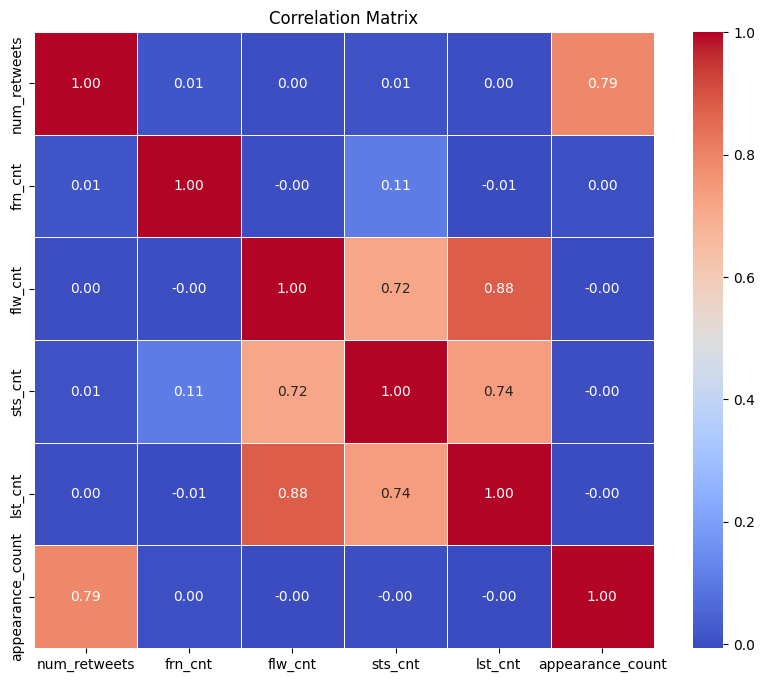

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_features[['num_retweets', 'frn_cnt', 'flw_cnt', 'sts_cnt', 'lst_cnt', 'appearance_count']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import pandas as pd
from scipy import stats

# Perform ANOVA
anova_result = stats.f_oneway(
    df_features[df_features['tcode'] == 'rt']['appearance_count'],
    df_features[df_features['tcode'] == 'mention']['appearance_count'],
    df_features[df_features['tcode'] == 'reply']['appearance_count']
)

# Print the ANOVA result
print('ANOVA result:', anova_result)

ANOVA result: F_onewayResult(statistic=20810.39238812777, pvalue=0.0)


In [ ]:
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 26.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Perform one-hot encoding on categorical variable 'category'
temp_df = df_features[['tcode', 'num_retweets', 'frn_cnt', 'flw_cnt', 'sts_cnt', 'lst_cnt', 'appearance_count']]
temp_df.dropna(inplace=True)
df_features_encoded = pd.get_dummies(temp_df, columns=['tcode'], drop_first=True)

df_features_encoded = df_features_encoded.astype(float)
X = sm.add_constant(df_features_encoded)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

<ipython-input-58-d8fb9d5c8c25>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.dropna(inplace=True)


           Variable       VIF
0             const  2.256764
1      num_retweets  2.684704
2           frn_cnt  1.054641
3           flw_cnt  4.689490
4           sts_cnt  2.392686
5           lst_cnt  5.058047
6  appearance_count  2.677241
7       tcode_reply  1.097041
8          tcode_rt  1.149347


In [ ]:
df_features_encoded

,num_retweets,frn_cnt,flw_cnt,sts_cnt,lst_cnt,appearance_count,tcode_reply,tcode_rt
0,36.0,696.150781,1543.289555,14114.732016,1.757412,9411.0,1.0,0.0
1,0.0,327.000000,208.666667,11230.333333,0.000000,3.0,1.0,0.0
2,0.0,28.000000,2.000000,75.000000,0.000000,1.0,0.0,0.0
3,0.0,2.000000,2.000000,234.000000,0.000000,1.0,1.0,0.0
4,0.0,1347.000000,1390.000000,60962.000000,0.000000,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
2161194,0.0,817.000000,214.000000,804.000000,0.000000,1.0,1.0,0.0
2161195,0.0,755.000000,376.000000,6844.000000,0.000000,1.0,1.0,0.0
2161196,0.0,21.000000,54.000000,1279.000000,0.000000,1.0,0.0,0.0
2161197,0.0,120.000000,73.000000,791.000000,0.000000,1.0,1.0,0.0


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


temp_df = df_features_encoded[['flw_cnt', 'lst_cnt']]
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(temp_df)

# Apply PCA
pca = PCA(n_components=1)  # Combine into 1 component
combined_feature = pca.fit_transform(scaled_data)

# Convert PCA result back to DataFrame
df_combined = pd.DataFrame(data=combined_feature, columns=['combined_flw_lst'])
print(pca.explained_variance_ratio_)

[0.94082369]


In [ ]:
df_combined

,combined_flw_lst
0,-0.099037
1,-0.102660
2,-0.102892
3,-0.102892
4,-0.101337
...,...
2161194,-0.102654
2161195,-0.102473
2161196,-0.102834
2161197,-0.102812


In [ ]:
df_features_encoded['combined_flw_lst'] = df_combined['combined_flw_lst']
df_features_encoded

,num_retweets,frn_cnt,flw_cnt,sts_cnt,lst_cnt,appearance_count,tcode_reply,tcode_rt,combined_flw_lst
0,36.0,696.150781,1543.289555,14114.732016,1.757412,9411.0,1.0,0.0,-0.099037
1,0.0,327.000000,208.666667,11230.333333,0.000000,3.0,1.0,0.0,-0.102660
2,0.0,28.000000,2.000000,75.000000,0.000000,1.0,0.0,0.0,-0.102892
3,0.0,2.000000,2.000000,234.000000,0.000000,1.0,1.0,0.0,-0.102892
4,0.0,1347.000000,1390.000000,60962.000000,0.000000,1.0,1.0,0.0,-0.101337
...,...,...,...,...,...,...,...,...,...
2161194,0.0,817.000000,214.000000,804.000000,0.000000,1.0,1.0,0.0,-0.102654
2161195,0.0,755.000000,376.000000,6844.000000,0.000000,1.0,1.0,0.0,-0.102473
2161196,0.0,21.000000,54.000000,1279.000000,0.000000,1.0,0.0,0.0,-0.102834
2161197,0.0,120.000000,73.000000,791.000000,0.000000,1.0,1.0,0.0,-0.102812


In [ ]:
# df_features_encoded.to_pickle('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/df_features_encoded.pkl')